In [8]:
import numpy as np
import pandas as pd
from sklearn import tree

In [9]:
df = pd.read_csv('weather.csv')
df.head()

,outlook,temperature,humidity,windy,rob
0,rainy,hot,high,False,no
1,rainy,hot,high,True,no
2,overcast,hot,high,False,yes
3,sunny,mild,high,False,yes
4,sunny,cool,normal,False,yes


In [10]:
df['rob'] = df['rob'].map({'yes':1,'no':0})
df['windy'] = df['windy'].astype(int)
df['humidity'] = df['humidity'].map({'high':1,'normal':0})
df['temperature'] = df['temperature'].map({'hot':2,'mild':1,'cool':0})
df['outlook'] = df['outlook'].map({'sunny':2,'overcast':1,'rainy':0})

In [11]:
df.head()

,outlook,temperature,humidity,windy,rob
0,0,2,1,0,0
1,0,2,1,1,0
2,1,2,1,0,1
3,2,1,1,0,1
4,2,0,0,0,1


In [16]:
features = list(df.columns[:-1])
features

['outlook', 'temperature', 'humidity', 'windy']

In [17]:
X = df[features]
y = df['rob']

In [48]:
entropyTree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [49]:
entropyTree = entropyTree.fit(X,y)


In [50]:
from sklearn.tree import export_text
printedTree = export_text(entropyTree,feature_names=features)
print(printedTree)

|--- humidity <= 0.50
|   |--- windy <= 0.50
|   |   |--- class: 1
|   |--- windy >  0.50
|   |   |--- outlook <= 1.50
|   |   |   |--- class: 1
|   |   |--- outlook >  1.50
|   |   |   |--- class: 0
|--- humidity >  0.50
|   |--- outlook <= 0.50
|   |   |--- class: 0
|   |--- outlook >  0.50
|   |   |--- windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- windy >  0.50
|   |   |   |--- class: 0



In [51]:
y_predicted = entropyTree.predict(X)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_predicted)*100

92.85714285714286

In [53]:
from IPython.display import Image
from six import StringIO
import pydotplus


In [54]:
dot_data = StringIO()

In [56]:
tree.export_graphviz(entropyTree,out_file=dot_data,feature_names=features)

In [57]:
#!pip install graphviz

In [58]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

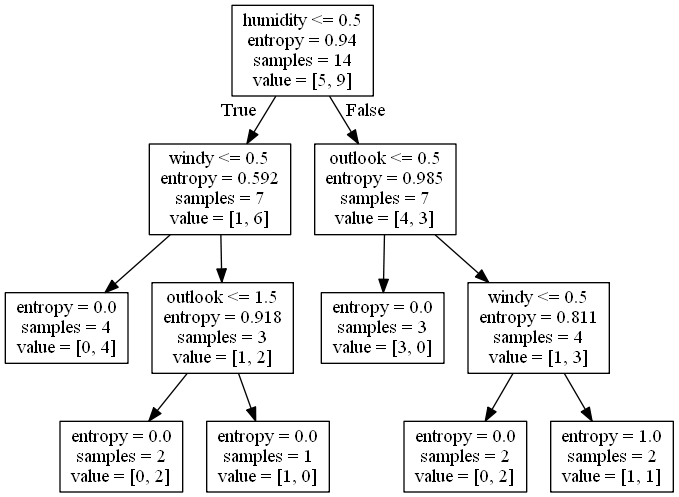

In [60]:
Image(graph.create_png())